In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)

In [2]:
df = pd.read_csv('data/citibike_ZIP.csv')
df.head()

,tripduration,starttime,stoptime,start_id,start_name,start_lat,start_lon,end_id,end_name,end_lat,end_lon,bikeid,usertype,birth_year,gender,weekday,hour,geometry,zip_start,zip_end
0,17.700000,2020-06-01 00:00:03.372,2020-06-01 00:17:46.208,3419,Douglass St & 4 Ave,40.679279,-73.981540,3419,Douglass St & 4 Ave,40.679279,-73.981540,39852,Customer,1997,2,0,0,POINT (989370.1838770027 186756.53892500512),11217,11217.0
1,63.500000,2020-06-01 00:00:03.553,2020-06-01 01:03:33.936,366,Clinton Ave & Myrtle Ave,40.693261,-73.968896,336,Sullivan St & Washington Sq,40.730477,-73.999061,37558,Subscriber,1969,0,0,0,POINT (992875.4144866021 191851.65323921342),11205,10012.0
2,16.950000,2020-06-01 00:00:09.614,2020-06-01 00:17:06.833,389,Broadway & Berry St,40.710446,-73.965251,3562,Classon Ave & St Marks Ave,40.676520,-73.959608,37512,Customer,1988,2,0,0,POINT (993883.8241576733 198112.87322040228),11249,11238.0
3,3.766667,2020-06-01 00:00:12.178,2020-06-01 00:03:58.864,3255,8 Ave & W 31 St,40.750585,-73.994685,505,6 Ave & W 33 St,40.749013,-73.988484,39674,Customer,1969,0,0,0,POINT (985722.6805079061 212735.19209770544),10001,10001.0
4,23.950000,2020-06-01 00:00:21.255,2020-06-01 00:24:18.965,367,E 53 St & Lexington Ave,40.758281,-73.970694,497,E 17 St & Broadway,40.737050,-73.990093,21093,Customer,1997,2,0,0,POINT (992368.8021711168 215540.1540624901),10022,10003.0


In [3]:
zip_shp = gpd.read_file('nyc_zip/ZIP_CODE_040114.shp')
zip_shp['ZIPCODE'] = zip_shp['ZIPCODE'].astype(int)

In [26]:
start_trips = df.groupby(['zip_start','zip_end'], as_index = False)[['bikeid']].count().\
    rename(columns = {'bikeid': 'count'})
start_trips['daily_avg'] = start_trips['count']/30
top10_trips = start_trips.sort_values(by = 'daily_avg', ascending = False).head(5)
top10_trips

,zip_start,zip_end,count,daily_avg
3341,11201,11201.0,24827,827.566667
144,10002,10002.0,23012,767.066667
0,83,83.0,19924,664.133333
623,10011,10011.0,16892,563.066667
215,10003,10003.0,16352,545.066667


In [12]:
trips_startend = df[df['zip_start'] != df['zip_end']]

In [25]:
trips_crosszip = df[df['zip_start'] != df['zip_end']].\
groupby(['zip_start','zip_end'], as_index = False)[['bikeid']].count().\
    rename(columns = {'bikeid': 'count'})
trips_crosszip['daily_avg'] = trips_crosszip['count']/28
top10_crosstrips = trips_crosszip.sort_values(by = 'daily_avg', ascending = False).head(6)
top10_crosstrips

,zip_start,zip_end,count,daily_avg
215,10003,10009.0,9328,333.142857
469,10009,10003.0,9122,325.785714
820,10014,10011.0,8533,304.750000
616,10011,10014.0,8292,296.142857
146,10002,10009.0,7623,272.250000
468,10009,10002.0,7612,271.857143


[]

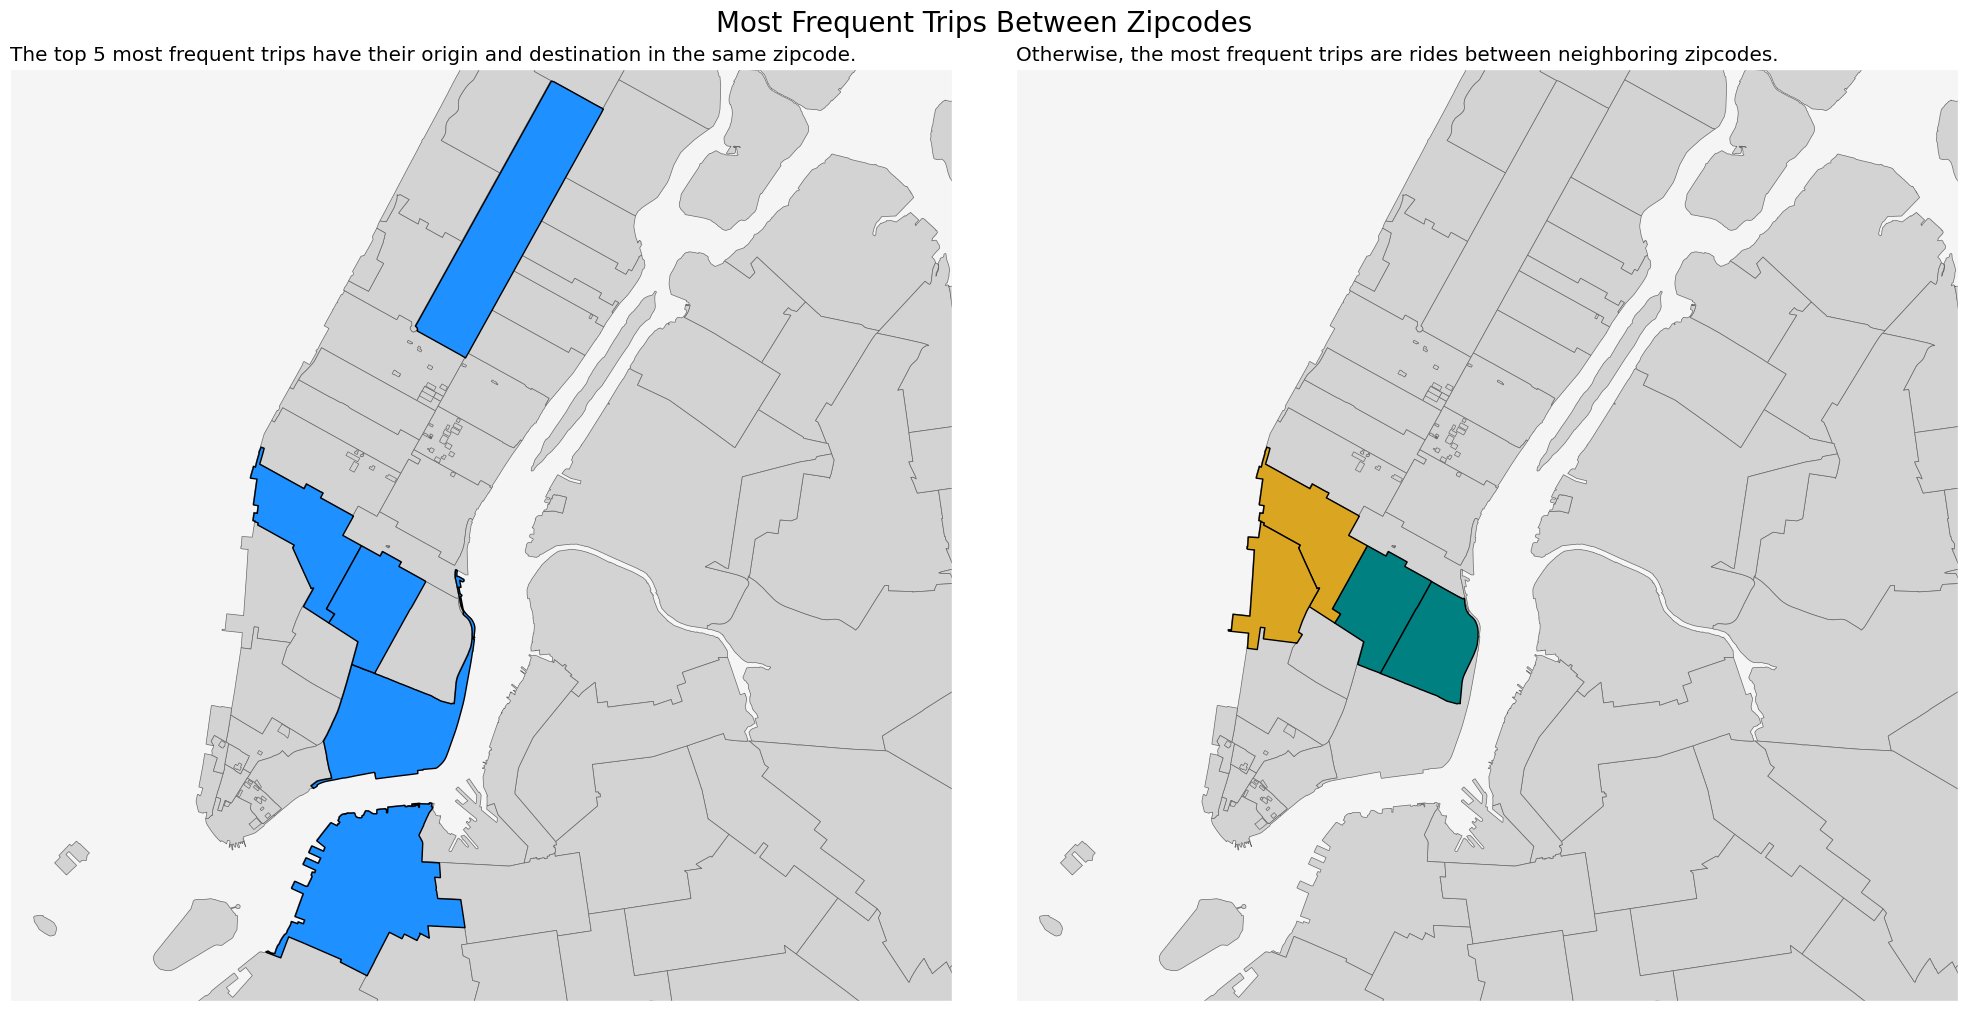

In [48]:
fig, (ax1, ax2) = plt.subplots(1,2, 
                        figsize=(20, 10),
                        sharex=False,
                        sharey=False,
                        constrained_layout=True)

fig.suptitle('Most Frequent Trips Between Zipcodes', fontsize=20)


zip_shp.plot(ax=ax1, color='lightgrey', edgecolor = 'dimgray')
zip_shp.loc[zip_shp['ZIPCODE'] == 11201].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10002].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 83].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10011].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10003].plot(ax=ax1, facecolor='dodgerblue', edgecolor='black', linewidth=1)

# teal, lightpink

ax1.set_title(label ='The top 5 most frequent trips have their origin and destination in the same zipcode.',
              loc='left')
ax1.set_xlim(970000, 1015000)
ax1.set_ylim(187000, 231500)
ax1.set_facecolor("whitesmoke")
ax1.grid(False)
ax1.set_xticks([])
ax1.set_yticks([])

ax2.set_title(label = 'Otherwise, the most frequent trips are rides between neighboring zipcodes.',
             loc='left')
zip_shp.plot(ax=ax2, color='lightgrey', edgecolor = 'dimgray')
zip_shp.loc[zip_shp['ZIPCODE'] == 10003].plot(ax=ax2, facecolor='teal', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10009].plot(ax=ax2, facecolor='teal', edgecolor='black', linewidth=1)

zip_shp.loc[zip_shp['ZIPCODE'] == 10011].plot(ax=ax2, facecolor='goldenrod', edgecolor='black', linewidth=1)
zip_shp.loc[zip_shp['ZIPCODE'] == 10014].plot(ax=ax2, facecolor='goldenrod', edgecolor='black', linewidth=1)


ax2.set_xlim(970000, 1015000)
ax2.set_ylim(187000, 231500)
ax2.set_facecolor("whitesmoke")
ax2.grid(False)
ax2.set_xticks([])
ax2.set_yticks([])